# Random Forest Regressor

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
# ?? RandomForestRegressor


Proszę narysować wykres dowolnej funkcji na odcinku $[0,3]$.

Będzie to model, który będziemy chcieli znaleźć.

In [3]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))

# Zadanie
wykonaj regresję z różnymi parametrami

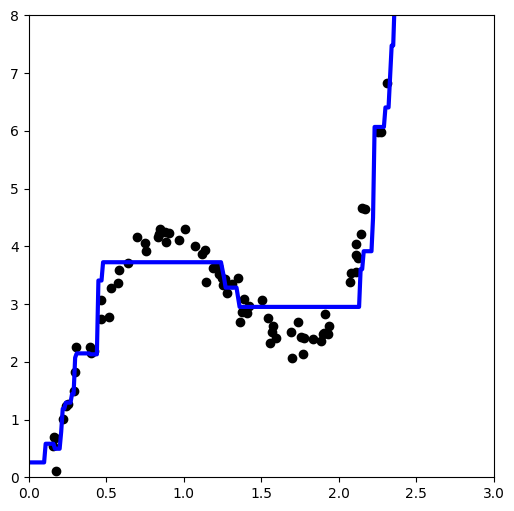

In [4]:
x=np.vstack(x)
x_plot = np.vstack(np.linspace(0, 10, 1000))
regr_rf = RandomForestRegressor(max_depth=5, n_estimators =5 ,random_state=2)
y_rbf = regr_rf.fit(x, y)
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x_plot, regr_rf.predict(x_plot), color='blue',linewidth=3)
plt.show()

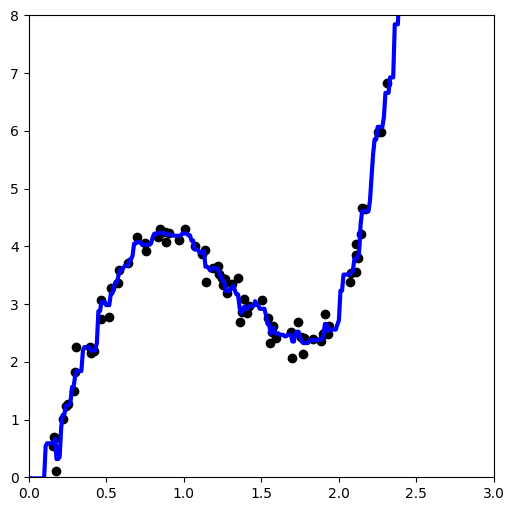

In [5]:
x=np.vstack(x)
x_plot = np.vstack(np.linspace(0, 10, 1000))
regr_rf = RandomForestRegressor(max_depth=10, max_features=1, n_estimators=10, random_state=3)
y_rbf = regr_rf.fit(x, y)
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x_plot, regr_rf.predict(x_plot), color='blue',linewidth=3)
plt.show()

# Zad
Wyznacz optymalne parametry w modelu RandomForestRegressor za pomocą GridSearchCV

In [6]:
grid = GridSearchCV(RandomForestRegressor(n_jobs=-1, max_features='sqrt', n_estimators=50, oob_score=True),
                      param_grid={'max_depth': [100, 300, 500, 600],
                                  'max_features': ['auto', 'sqrt', 'log2'],
                                  'n_estimators': [100, 200, 300, 400]},
                      #cv=kfold,
                      refit=True)

grid.fit(x, y)
grid.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

{'max_depth': 300, 'max_features': 'sqrt', 'n_estimators': 100}

# Zad

Wyznacz optymalne parametry dla modelu RandomForestRegressor.

In [7]:
import pandas as pd
df_adv = pd.read_csv('Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
grid = GridSearchCV(RandomForestRegressor(n_jobs=-1, max_features='sqrt', n_estimators=50, oob_score=True),
                      param_grid={'max_depth': [100, 300, 500, 600],
                                  'max_features': ['auto', 'sqrt', 'log2'],
                                  'n_estimators': [100, 200, 300, 400]},
                      #cv=kfold,
                      refit=True)

grid.fit(X, y)
print(grid.best_params_)
grid.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

{'max_depth': 100, 'max_features': 'auto', 'n_estimators': 100}


RandomForestRegressor(max_depth=100, max_features='auto', n_jobs=-1,
                      oob_score=True)